In [5]:
import pandas as pd

# Set the file path
file_path = '/Users/azambaloch/Downloads/archive/all_stocks_5yr.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Display the first few rows
df.head()


,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Matplotlib is building the font cache; this may take a moment.


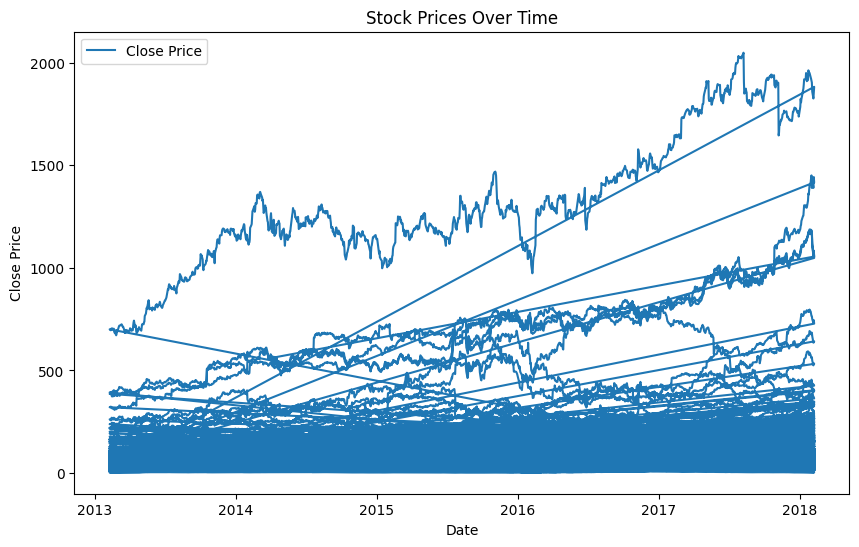

In [8]:
import matplotlib.pyplot as plt

# Plot the close prices over time
plt.figure(figsize=(10,6))
plt.plot(df['close'], label='Close Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


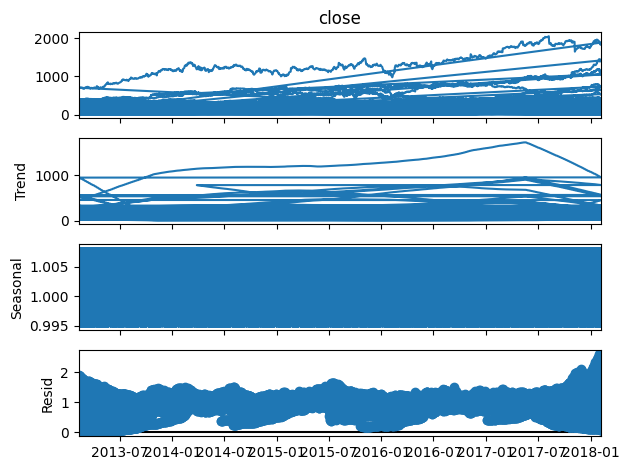

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['close'], model='multiplicative', period=365)

# Plot the decomposition
decomposition.plot()
plt.show()


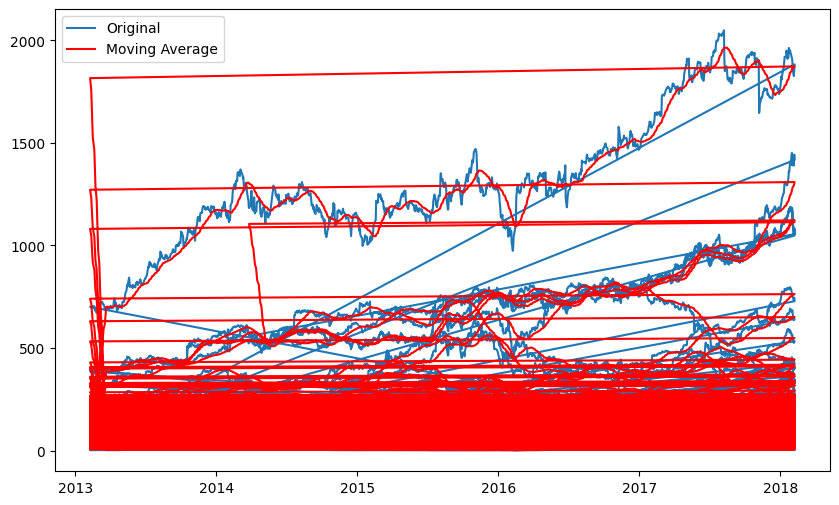

In [10]:
# Calculate moving average
df['Moving_Average'] = df['close'].rolling(window=30).mean()

# Plot the original series and moving average
plt.figure(figsize=(10,6))
plt.plot(df['close'], label='Original')
plt.plot(df['Moving_Average'], color='red', label='Moving Average')
plt.legend()
plt.show()


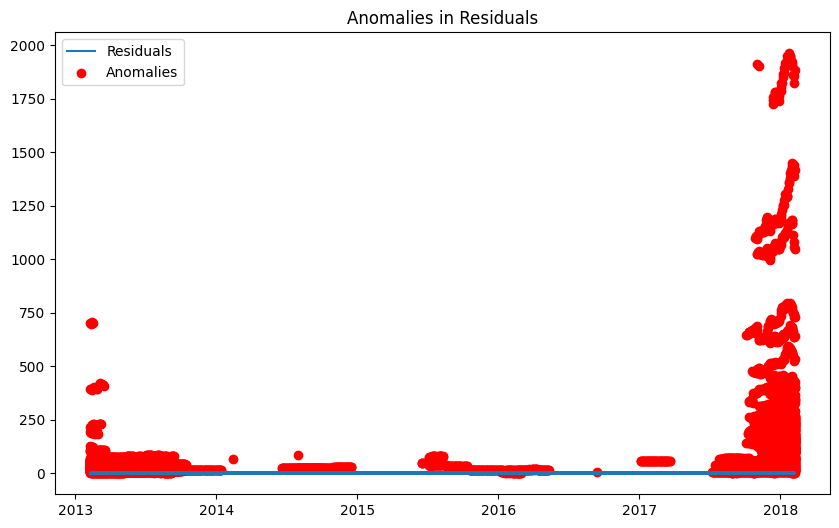

In [11]:
import numpy as np

# Calculate the residuals
residual = decomposition.resid

# Calculate the z-scores of the residuals
z_scores = np.abs((residual - np.mean(residual)) / np.std(residual))

# Identify anomalies (z-score > 3)
anomalies = df[z_scores > 3]

# Plot the residuals and anomalies
plt.figure(figsize=(10,6))
plt.plot(residual, label='Residuals')
plt.scatter(anomalies.index, anomalies['close'], color='red', label='Anomalies')
plt.title('Anomalies in Residuals')
plt.legend()
plt.show()


In [12]:
import os
os.getcwd()


'/Users/azambaloch'